# Sea Level Rise Prediction

Created by Jack Foley - C00274246

Note: The original file, sealevel.xls, did not load correctly using pandas. Changing the filetype to .csv has solved the issue and must be done prior to creating the model.

## Goal

The goal for this dataset is to produce a linear regression machine learning model to make predictions on the change in sea level in mm in the coming years. 

## Setup

This was run on a UNIX system, so running the model may vary, but since it is in python it should be very similar if not the same.

### Create a virtual environment. 

This software does not ship with the requirements. It is vital that you create an environment for yourself and install the needed requirements.

This process can vary based on what Operating System (OS) you are using.

#### Windows

```bash 
python -m venv venv
```

#### UNIX/Mac

```bash
python3 -m venv venv
```

### Activate the virtual environment.

#### Windows (PowerShell)

```bash
venv/Scripts/Activate.ps1
```

#### UNIX/Mac

```bash
source venv/bin/activate
```

### Install Requirements

Finally, install the requirements by running the following command:

```bash
pip install -r requirements.txt
```

## Support

For support, contact me at C00274246@setu.ie

Sea Level Rise Prediction © 2024 by Jack Foley is licensed under CC BY-NC-ND 4.0


In [2]:
import pandas as pd
import os
import logging


# os.path.abspath('') is analagous to __file__ in Jupyter Notebook, since __file__ is not defined in a script. 
__file__ = os.path.abspath('')
DATASET = os.path.join(__file__, '..', 'datasets', 'sealevel.csv')

def load_data():
    try:
        return pd.read_csv(DATASET)
    except FileNotFoundError:
        logging.error(f"Dataset not found at {DATASET}")
        return None

df = load_data()
df.head()


,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [3]:
df.isnull().sum()

Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64

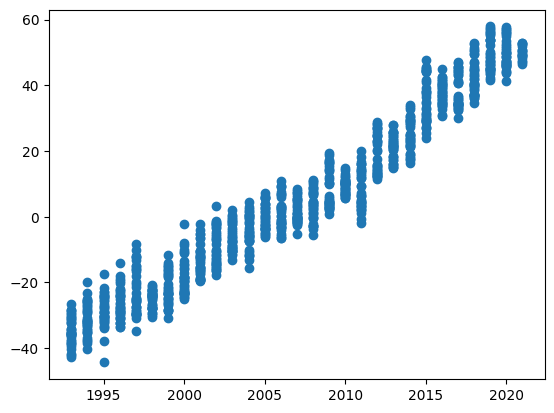

In [4]:
years = df['Year']
gmsl_nogia = df['GMSL_noGIA']

import matplotlib.pyplot as plt

plt.scatter(years, gmsl_nogia)

best fit line:
y = -6249.08 + 3.12x


Text(0, 0.5, 'GMSL_noGIA')

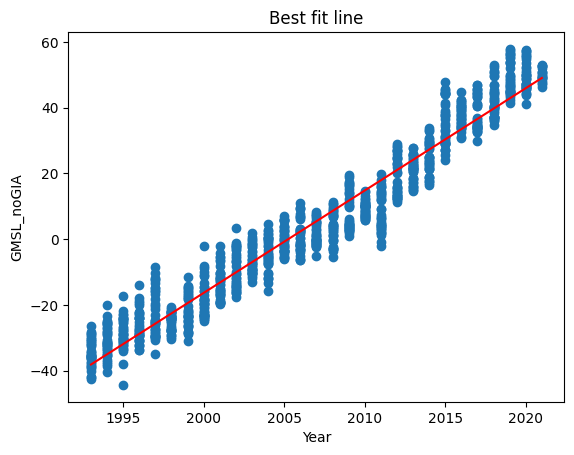

In [5]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

a, b = best_fit(years, gmsl_nogia)

# overlay best fit onto scatter plot
plt.scatter(years, gmsl_nogia)
yfit = [a + b * year for year in years]
plt.plot(years, yfit, color='red')
plt.title('Best fit line')
plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# reshape to 2D array as must be two dimensional.
X = years.values.reshape(-1, 1)

# create linear regression object
regr = linear_model.LinearRegression()

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, gmsl_nogia, test_size=0.2, random_state=872390)

# train the model
regr.fit(X_train, y_train)

# calculate the R^2 score
r2 = regr.score(X_test, y_test)
print(f'R^2 score: {r2}')

R^2 score: 0.9458382420440216


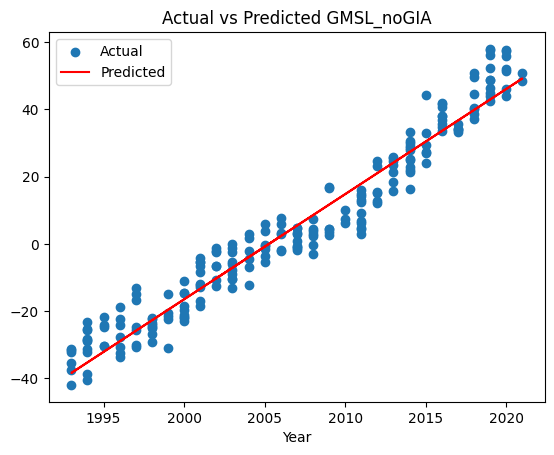

In [7]:
# Compare the predicted values to the actual values
y_pred = regr.predict(X_test)

#make a scatter plot of the actual values vs the predicted values, extending the years by 50 years
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs Predicted GMSL_noGIA')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'])


Text(0, 0.5, 'GMSL_noGIA')

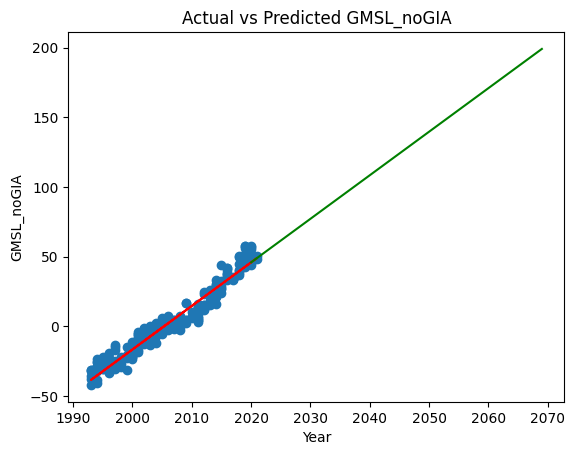

In [8]:
# make predictions for the next 50 years
import numpy as np
future_years = np.array([year for year in range(2020, 2070)]).reshape(-1, 1)
future_gmsl = regr.predict(future_years)

# plot the future predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.plot(future_years, future_gmsl, color='green')
plt.title('Actual vs Predicted GMSL_noGIA')
plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')
